# 1. 패키지 로딩

In [4]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### None Cross VZalidation

In [6]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,test_size=0.3, random_state=10)
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)
y_hat = model.predict(X_test)
print(f'정확도:{accuracy_score(y_test,y_hat):.3f}')

정확도:0.978


### K-Fold Cross Validation

In [8]:
print(len(iris.target))
print(iris.target)

150
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
k_fold = KFold(n_splits=5)
X = iris.data
y = iris.target
# 교차검증 횟수
k = 0 
# 교차 검증마다 정확도 저장
cv_acc = [] 
model = DecisionTreeClassifier(random_state=1)
for train_index, test_index in k_fold.split(X):
  k +=1
  print(f'{k}번째 검증 데이터 셋')
  print('Train: ', train_index)
  print('Test: ',test_index)
  
  X_train, y_train = X[train_index], y[train_index]
  X_test, y_test = X[test_index], y[test_index]
  
  model.fit(X_train, y_train)
  y_hat =model.predict(X_test)
  acc = accuracy_score(y_test,y_hat)
  print(f'{k}번째 교차검증 정확도:{acc:.3f}')
  cv_acc.append(acc)
  
print()
print(f'평균 정확도: {np.mean(cv_acc):.3f}')

1번째 검증 데이터 셋
Train:  [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
Test:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
1번째 교차검증 정확도:1.000
2번째 검증 데이터 셋
Train:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 11

# Stratified K-fold Cross Validation

In [12]:
# 교차검증 횟수
k = 0
# 교차 검증마다 정확도 저장
cv_acc = []
stf_kfold = StratifiedKFold(n_splits=5)

model = DecisionTreeClassifier(random_state=1)
for train_index, test_index in stf_kfold.split(X,y):
  k +=1
  print(f'{k}번째 검증 데이터 셋')
  print('Train: ', train_index)
  print('Test: ',test_index)
  
  X_train, y_train = X[train_index], y[train_index]
  X_test, y_test = X[test_index], y[test_index]
  
  model.fit(X_train, y_train)
  y_hat =model.predict(X_test)
  acc = accuracy_score(y_test,y_hat)
  print(f'{k}번째 교차검증 정확도:{acc:.3f}')
  cv_acc.append(acc)
  
print()
print(f'평균 정확도: {np.mean(cv_acc):.3f}')

1번째 검증 데이터 셋
Train:  [ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
Test:  [  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
1번째 교차검증 정확도:0.967
2번째 검증 데이터 셋
Train:  [  0   1   2   3   4   5   6   7   8   9  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98 

# cross_val_score()
- estimator: 학습에 사용된 모델 객체
- x: 독립변수 데이터 셋
- y: 종속변수 데이터 셋
- cv: 교차검증 k값(default:5), 또는 교차검증 객체

In [13]:
score = cross_val_score(model, X, y)
print(score)
print(f'평균 정확도:{np.mean(score):.3f}')

[0.96666667 0.96666667 0.9        1.         1.        ]
평균 정확도:0.967


# 6. cross_validate()
- cross_val_score()와 유사
- 단, 매 검증마다 소요된 학습 시간과 검증 시간을 딕셔너리로 반환한다.
- 여러가지 평가지표를 리스트로 전달할 수 있다.

In [14]:
result = cross_validate(model, X, y, cv=5, scoring=['accuracy','precision_macro','roc_auc_ovr'])
for key, val in result.items():
  print('평가지표:',key)
  print(f'평값값:{np.mean(val):.3f}')

평가지표: fit_time
평값값:0.003
평가지표: score_time
평값값:0.005
평가지표: test_accuracy
평값값:0.967
평가지표: test_precision_macro
평값값:0.968
평가지표: test_roc_auc_ovr
평값값:0.975


In [15]:
# 평가지표 종류 확인
import sklearn
print(sklearn.metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

# 분류분석(Classifiaction Analysis)
- 정의
  - 종속변수가 범주형인 데이터에 대해 데이터의 유사성(특이성이 비슷한)이 높은 것들을 같은 종류로 분류가 되도록 하는 분석방법
- 용도
  - 종속변수가 미리 결정된 범주 중 하나에 속할 가능성 또는 확률을 예측
  - 미래 데이터 세트에서 동일한 패턴(유사한 시퀀스, 단어 또는 감정)을 찾고자 할 때 사용
  - 이메일 스팸 분류, 고객의 유형 분류 등 종속변수가 범주형 값을 값는 데이터를 예측하는데 주로 활용
- 종류
  - 로지스틱 회귀분석: 종속변수가 범주형 변수일 때 사용하는 회귀분석
  - 의사결정트리: 나무 형태의 그래프로 의사 결정을 표현하여 데이터를 분류하는 알고리즘
  - 나이브베이즈: 데이터 집합의 예측 변수가 독립적이라고 가정하는 분류 알고리즘
  - K-Nearest Neighbors: 데이터 포인터 간의 거리를 기반으로 데이터를 분류 및 예측하는 알고리즘

- 로지스틱 회귀분석(Logistic Regression)
  - 종속변수가 범주형 변수일 때 입력 변수를 기반으로 결과를 예측하기 위한 분석 방법
  - 회귀식을 이용하여 새로운 값에 대한 분류를 하지만 목표변수가 범주형 변수인 경우에 사용한다는 점에서 일반 회귀분석과 차이가 있음
  - 이진분류 문제를 풀기 위한 대표적인 알고리즘
  - 로지스틱 회귀분석 -> 두개의집단값(예: 합격/불합격) = 이항 로지스틱
  - P(Y = 1 | X = x) 계산
  - 임계값(Cut-off value) 결정
  - p(Y = 1 | X = x)가 임계값 보다 큰 경우 1로, 작은 경우 0으로 분류
  - 데이터를 두개의 그룹으로 분류하는 문제에서 로지스틱 회귀분석이 일반 회귀분석과의 차이는 회귀분석에서 종속변수(y)의 결과는 실수이지만 로지스틱 회귀분석에서는 종속변수 값이 0 또는 1을 갖는다.
  - 따라서, 이진분류 문제에서 선형함수를 사용할 수 없다.
  - 비선형 모델
  - 지수함수를 활용한 회귀분석
  - 확률밀도함수(Probability Density Function), 출력 결과: 0~1

# 1. 시그모이드 함수 그리기

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

- 주어진 데이터에 가장 적합한 w와 b를 구하는 것이 목적이다.
- x가 0일때 출력 값이 0.5를 갖는다.

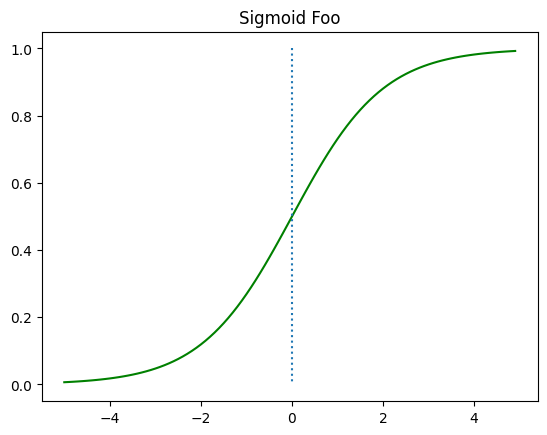

In [18]:
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)

plt.plot(x, y,'g')
# 가운데 점선 추가
plt.plot([0,0],[1.0,0.0],':')
plt.title('Sigmoid Foo')
plt.show()

- w의 값에 따라 경사도가 바뀐다.(선형회귀에서 w가 직선의 기울기를 의미하는 것과 동일)

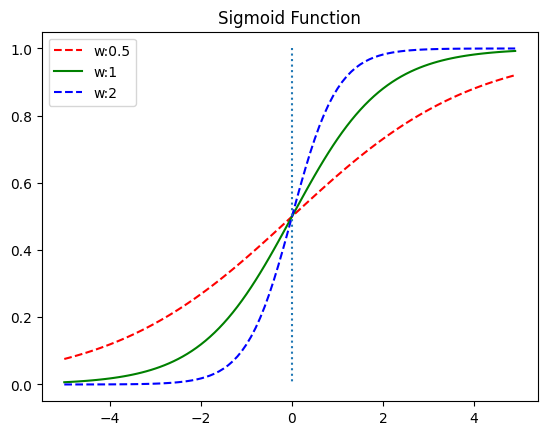

In [20]:
x = np.arange(-5.0,5.0,0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x,y1,'r--', label='w:0.5') # w가 0.5일 때
plt.plot(x,y2,'g', label='w:1') # w가 1일 때
plt.plot(x,y3,'b--', label='w:2') # w가 2일 때
plt.plot([0,0],[1.0,0.0],':')
plt.title('Sigmoid Function')
plt.legend()
plt.show()

- 비용함수
  - 로지스틱 회귀의 비용함수 또한 경사 하강법을 이용하여 최적의 w를 찾지만, 비용함수로 평균 제곱 오차를 사용하지 않는다.
  - 로지스틱 회귀에서 사용하는 비용 함수를 크로스 엔트로피(Cross Entropy)함수라고 한다.
  - Cross Entropy

- Confusion Matrix(혼동행렬)
  - 분류모델에서 알고리즘의 성능을 보기 쉽게 시각화 하는 테이블 형태의 레이아웃
  - 분류 모델에 의한 분류 예측이 실제와 같은 지 다른 지를 표시하고 이를 평가하는 방법이다.
  - 실제와 예측을 비교하면서 예측과 실제가 같으면 True, 다르면 False로 표현한다.

F1 Score 높으면 좋음 
Precision과 Recall의 조화평균 값
F1 Score = 2pr/p+r

ROC/AUC
ROC(Receiver Operation Characteristic curve)
- 다양한 분류 임계값(threshold)에서 참양성율(Recall,민감도)과 거짓양성률(1-특이도)이 이루는 곡선
-AUC(Area Under Curve)
ROC Curve 아래의 면적을 AUC라고 한다.AUC가 클수록 예측력이 높다.
AUC = 0.5 이상이면 np better than chance

TNR(True Negative Rate,특이도): 실제 음성 중 맞춘 음성 비율
False Positive Rate(거짓양성률) = 1-

- 결정함수
- 분류기는 각 샘플의 절정 합스를 자용헌어0ㅇ==ㅇ

# 2. 유방암판별 예측
- y변수가 범주형인 경우

### 2. 패키지 로eld

In [56]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score,recall_score, roc_curve,roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

In [57]:
breast =load_breast_cancer()
# print(breast.DESCR)

df = pd.DataFrame(breast.data,columns=breast.feature_names)
df['class'] = breast.target
df.head()
df['class'].value_counts()
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### 2.4 데이터 스케일링

In [58]:
scaled_X = StandardScaler().fit_transform(X)

### 2.5 학습 데이터와 평가 데이터 분할

In [59]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X,y,test_size=0.3,random_state=0,stratify=y)

In [60]:
X = breast.data
y = breast.target

X.shape, y.shape

((569, 30), (569,))

### 모델 생성
- 회귀계수 최적화 옵션
    - solver : 최적화 문제에 사용할 알고리즘
        >- 'lbfgs' : solver의 기본값. CPU 코어 수가 많다면 최적화를 병렬로 사용할 수 있다
        >- 'liblinear' : 작은 데이터에 적합한 알고리즘.
        >- 'sag','saga' : 확률적 경사하강법을 기반으로 한 알고리즘으로 대용향 데이터에 적합
        >- 'newton-cg','sag','saga' 및 'libfgs'만 다항 손실을 처리. 즉, 멀티 클래스 분류 모델에 사용 가능
    - solver에 따른 규제 지원 사항
        >- newton-cg, lbfgs, sag : L2
        >- linlinear, saga : L1, L2
    - multi_class : 다중클래스분류 문제의 상황에서 어떤 접근방식을 취할지 결정
        >- 'ovr' : 이진분류기인 sigmoid 함수를 이용하여 결과 예측
        >- 'multinominal' : 각 클래스에 대한 softmax 확률 값으로 다중분류를 수행
    - C : 규제의 강도의 역수. 양의 실수 값. 선형회귀모형에서 alpha이고, SVM과 LogisticRegression과 같이 분류 모델에서는 C를 사용.(C값이 작을수록 모델이 단순해진다.)
    - max_iter : solver가 수렴하는데 필요한 반복 횟수 (default:100)


In [61]:
model = LogisticRegression()
model.fit(X_train, y_train)

print('추정 계수(가중치):', model.coef_)
print('절편:', model.intercept_)

추정 계수(가중치): [[-0.54406091 -0.41605507 -0.51991133 -0.59308816  0.0027904   0.41939012
  -0.78884789 -1.02290774 -0.15221315  0.37699245 -1.07237296 -0.06165012
  -0.54319278 -0.69191037 -0.21537603  0.61125449  0.11034357 -0.26876198
   0.49779553  0.42281321 -0.97636344 -1.08977767 -0.82614726 -0.86970513
  -0.55575019 -0.15928048 -0.62816926 -0.7691139  -0.67505294 -0.73082045]]
절편: [0.23582794]


### 2.7 모델 예측

In [62]:
y_hat = model.predict(X_test)
print('예측값: ',y_hat[:20])
print('실제값 : ',y_test[:20])

예측값:  [0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0]
실제값 :  [0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0]


### 평가 지표
- 혼동 행렬 함수는 행을 True, 열을 predict 값으로 이용하며, 양성과 음성의 구분은 별도의 레이블을 지정하지 않으면 레이블 값의 정렬된 순서로 사용한다.
(0: Negative, 1: Positive)
```python
y_true = [1,0,1,1,0,1]
y_hat = [0,0,1,1,0,1]
confusion_matrix(y_true, y_hat)
[[2,0],
[1,3]]
confusion_matrix(y_true, y_hat,label=[1,0])
```
  Predict
|구분|N|P|
|------|---|---|
|N|TN|FP|
|P|FN|TP|


In [63]:
matrix = confusion_matrix(y_test, y_hat)
print(matrix)

[[ 61   3]
 [  4 103]]


In [64]:
accuracy = accuracy_score(y_test,y_hat)
print(f'정확도: {accuracy:.3f}') # (61+103) / (61+3+4+103)
precision = precision_score(y_test,y_hat)
print(f'정밀도: {precision:.3f}') # 103/ (3+103)
recall = recall_score(y_test, y_hat)
print(f'재현율: {recall:.3f}') # 103/(4+103)
pred_proba_positive = model.predict_proba(X_test)[:,1]
# np.round(pred_proba_positive,3)
fpr, tpr,threshold = roc_curve(y_test, pred_proba_positive)
# roc_data = pd.DataFrame(fpr,tpr)
roc_data = np.concatenate([fpr.reshape(-1,1),tpr.reshape(-1,1),np.round(threshold.reshape(-1,1),3)],axis=1)
roc_data = pd.DataFrame(roc_data,columns=['FPR','TPR','THRESHOLD'])
display(roc_data)
auc = roc_auc_score(y_test, pred_proba_positive)
print(auc)

정확도: 0.959
정밀도: 0.972
재현율: 0.963


,FPR,TPR,THRESHOLD
0,0.000000,0.000000,2.000
1,0.000000,0.009346,1.000
2,0.000000,0.897196,0.906
3,0.015625,0.897196,0.903
4,0.015625,0.915888,0.882
5,0.031250,0.915888,0.875
6,0.031250,0.953271,0.602
7,0.046875,0.953271,0.537
8,0.046875,0.971963,0.493
9,0.062500,0.971963,0.432


0.9956191588785047


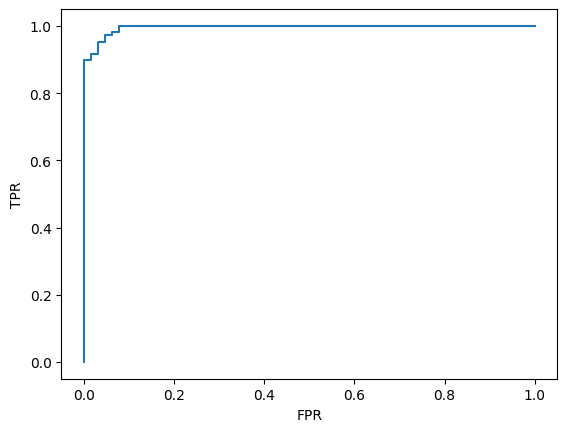

In [66]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [67]:
optimal_threshold = threshold[np.argmax(tpr-fpr)]
print(f'최적의 임계값:{optimal_threshold:.3f}')

최적의 임계값:0.493


### 2.9 임계값 변화에 따른 재현율과 정밀도 변환 확인

In [69]:
from sklearn.metrics import classification_report

def threshold_filter(prob, threshold):
  return np.where(prob > threshold,1,0)
pred_1 = threshold_filter(pred_proba_positive,0.5)
pred_2 = threshold_filter(pred_proba_positive,0.6)
pred_3 = threshold_filter(pred_proba_positive,0.7)

print(classification_report(y_test,pred_1))
print('-'*50)
print(classification_report(y_test,pred_2))
print('-'*50)
print(classification_report(y_test,pred_3))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95        64
           1       0.97      0.96      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        64
           1       0.98      0.95      0.97       107

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        64
           1       0.98      0.94      0.96       107

    accuracy                           0.95       171
   macro avg       0.95   

### 2.10 solver 별 성능평가 비교

In [77]:
solvers = ['lbfgs', 'liblinear','newton-cg','sag','saga']

for solver in solvers:
  model = LogisticRegression(solver=solver,max_iter=600)
  model.fit(X_test, y_test)
  y_hat =model.predict(X_test)
  
  print(f'solver: {solver},accuracy: {accuracy_score(y_test,y_hat):.3f},roc_auc: {roc_auc_score(y_test,model.predict_proba(X_test)[:,1]):.3f}')

solver: lbfgs,accuracy: 0.988,roc_auc: 0.999
solver: liblinear,accuracy: 0.988,roc_auc: 0.999
solver: newton-cg,accuracy: 0.988,roc_auc: 0.999
solver: sag,accuracy: 0.988,roc_auc: 0.999
solver: saga,accuracy: 0.988,roc_auc: 0.999


In [88]:
### 개인의 신용도를 기반으로 대출한도
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, roc_auc_score,roc_curve


### 3.3.1 불필요한 컬럼 제거

In [89]:
data = pd.read_csv('Personal_Loan.csv')
data = data.drop(['ID', 'ZIP Code'], axis=1)

###  독립변수와 종속변수 분리

In [90]:
X = data.drop('Personal Loan', axis=1)
y = data['Personal Loan']

In [91]:
y.value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

### 학습 데이터와 평가 데이터 분할

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=40)

### 모델생성

In [93]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [97]:
np.set_printoptions(suppress=True, precision=2)

- 로지스틱 회귀에서 회귀계수의 해석
  - 로지스틱 회귀계수는 지수변환(exp()함수를 취한다)을 해주면 Odds비가 나온다.
  - Odds비: 성공할확률/실패할확률
  - 대출여부에 영향을 미치는 A변수의 오즈비가 1보다 큰 경우 대출 승인확률이 높다는 결과이다.(만약 14라면 대출거부 확률보다 대출승인 확률이 14배 높다는 의미)

In [101]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train,y_train)

coef= model.coef_.squeeze(axis=0)
print('추정 계수(가중치): ',coef)
odds_rate = np.exp(coef)
print('추정 계수(odds비): ',odds_rate)
coef_df = pd.DataFrame({'가중치':coef, 'Odds비':odds_rate}, index =X.columns)
coef_df


추정 계수(가중치):  [-0.1   0.12  0.05  0.73  0.11  1.7   0.   -0.89  3.25 -0.57 -0.79]
추정 계수(odds비):  [ 0.91  1.12  1.06  2.07  1.12  5.46  1.    0.41 25.91  0.57  0.46]


,가중치,Odds비
Age,-0.098371,0.906313
Experience,0.117487,1.124667
Income,0.053889,1.055367
Family,0.729686,2.074429
CCAvg,0.112974,1.119602
Education,1.698312,5.464714
Mortgage,0.000434,1.000434
Securities Account,-0.888107,0.411434
CD Account,3.254758,25.913340
Online,-0.569898,0.565583


### 3.7 모델 평가

In [102]:
cf = confusion_matrix(y_test,y_hat)
cf_df = pd.DataFrame(cf, index=[['actual','actual'],['대출불허(0)','대출승인(1)']], columns=[['predict','predict'],['대출불허(0)','대출승인(1)']])
display(cf_df)

# 평가
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'정확도:{accuracy:.3f}', )
print(f'정밀도:{precision:.3f}', )
print(f'재현율:{recall:.3f}', )

ValueError: Found input variables with inconsistent numbers of samples: [1500, 171]